# Primeira Aula

In [455]:
import pandas as pd # Importando o pandas

In [456]:
import numpy as np # Importando Numpy

In [457]:
import seaborn as sns # Importa o seaborn

In [458]:
import matplotlib.pyplot as plt # Importa o matplotlib

In [459]:
notas = pd.read_csv("/content/drive/MyDrive/Alura/dados/ratings.csv") # Transformando os dados em uma variável
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [460]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head() # Selecionando as colunas que quero visualizar

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [461]:
notas['nota'].unique() # Exibe os valores distintos
notas['nota'].value_counts() # Exibe quantas vezes os valores distintos foram utilizados

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [462]:
notas['nota'].value_counts().index # Os valores únicos

Index([4.0, 3.0, 5.0, 3.5, 4.5, 2.0, 2.5, 1.0, 1.5, 0.5], dtype='float64', name='nota')

In [463]:
notas['nota'].value_counts().values # Quantas vezes os valores únicos aparecem

array([26818, 20047, 13211, 13136,  8551,  7551,  5550,  2811,  1791,
        1370])

<Axes: ylabel='Frequency'>

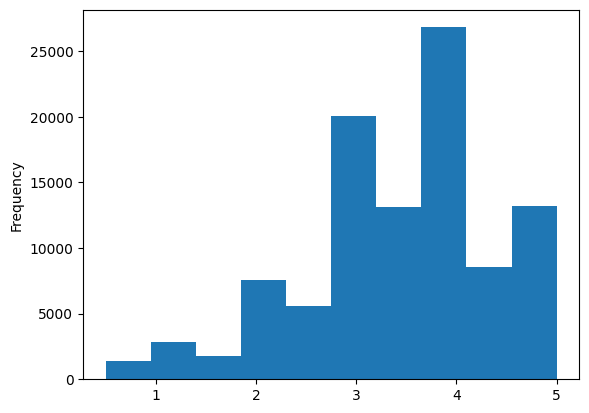

In [464]:
notas["nota"].plot(kind='hist') # Cria o gráfico padrão do tipo Histograma

<Axes: ylabel='nota'>

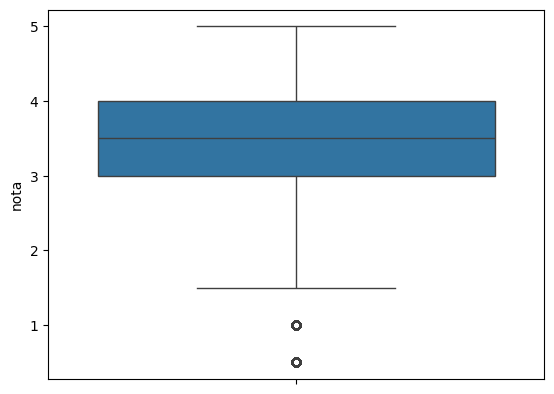

In [465]:

sns.boxplot(notas["nota"]) # Cria o gráfico boxplot padrão do seaborn

In [466]:
media = notas["nota"].mean() # Calculo de media
mediana = notas["nota"].median() # Calculo de mediana
print(f"Média é {media}") # print(f'') para preencher com o valor da variável
print(f"Mediana é {mediana}")

Média é 3.501556983616962
Mediana é 3.5


In [467]:
notas["nota"].describe() # Trás um resumo de valores estatísticos :
# número de valores não nulos
# média
# desvio padrão
# valor mínimo
# 1º quartil
# mediana
# 3º quartil
# valor máximo

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


# Segunda Aula

In [468]:
filmes = pd.read_csv("/content/drive/MyDrive/Alura/dados/movies.csv") # Transformando o banco de dados em variável
filmes.columns = ["filmeId", "titulo", "generos"] # Filtrando as colunas desejadas
filmes.head() # Exibindo os 5 primeiros

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [469]:
notas.query("filmeId==1").nota.mean() # Selecionando um filme com base no seu ID e fazendo a média das suas notas

np.float64(3.9209302325581397)

In [470]:
notas.query("filmeId==2")["nota"].mean() # Outra forma de buscar as notas para o cálculo sem transformar em variável

np.float64(3.4318181818181817)

In [471]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean() # Agrupando os dados com base na coluna passada e fazendo e tira a média
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

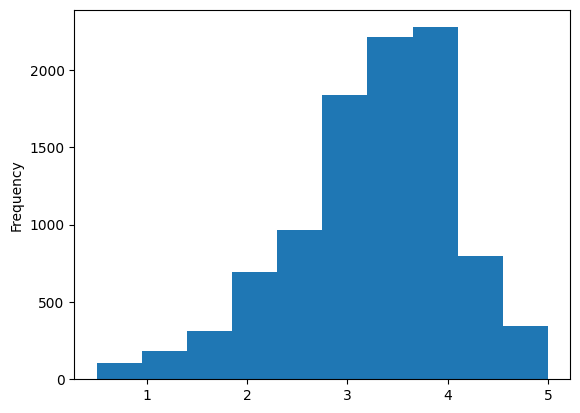

In [472]:
medias_por_filme.plot(kind='hist') # Gráfico Historama

<Axes: ylabel='nota'>

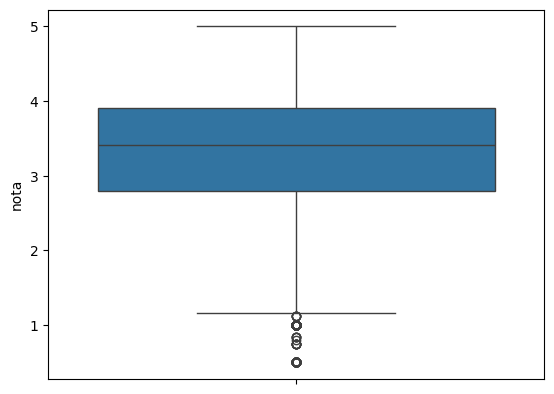

In [473]:
sns.boxplot(medias_por_filme) # Gráfico boxplot

In [474]:
medias_por_filme.describe() # Valores estatísticos

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Histograma da média dos filmes')

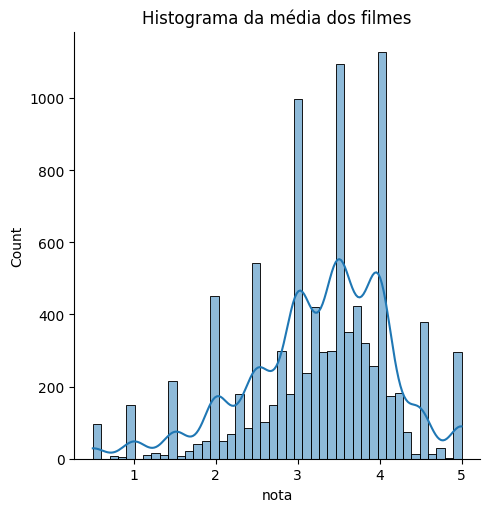

In [475]:
sns.displot(medias_por_filme, kde=True) # Gráfico de densidade,Estimativa de Densidade por Kernel (Kernel Density Estimate)
plt.title('Histograma da média dos filmes')

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

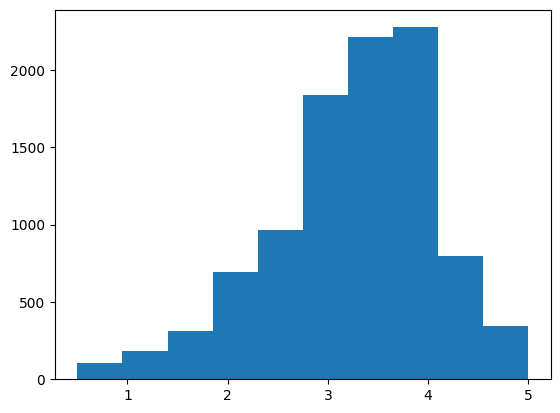

In [476]:
plt.hist(medias_por_filme) # Gráfico de barras

# Terceira Aula

In [477]:
tmdb = pd.read_csv("/content/drive/MyDrive/Alura/dados/tmdb_5000_movies.csv") # Importando o banco de dados
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Text(0.5, 1.0, 'Distruibuição de Receita')

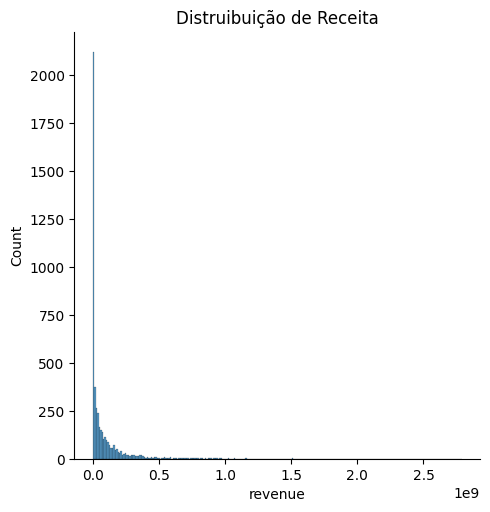

In [478]:
sns.displot(tmdb["revenue"]) # Gera o gráfico
plt.title('Distruibuição de Receita') # Troca o título

Text(0.5, 1.0, 'Distruibuição de Orcamento')

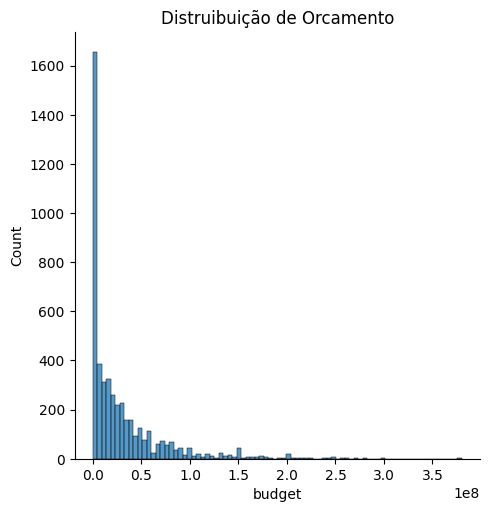

In [479]:
sns.displot(tmdb["budget"]) # Gera o gráfico
plt.title('Distruibuição de Orcamento') # Troca o título

In [480]:
tmdb.info() # Exibe as informações do banco de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [481]:
tmdb.describe() # Exibe as informações estatísticas do banco de dados

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [482]:
com_faturamento = tmdb.query("revenue > 0")

Text(0.5, 1.0, 'Distruibuição de Receita')

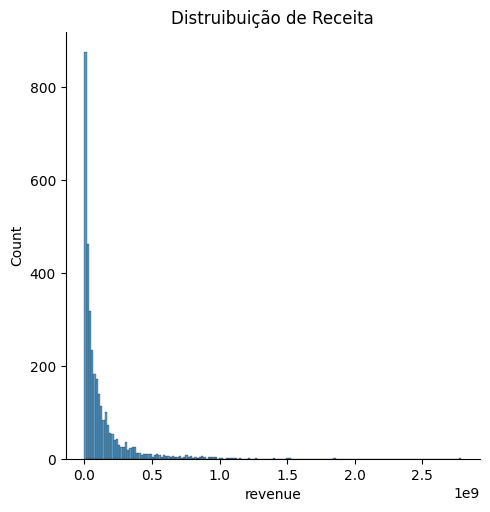

In [483]:
sns.displot(com_faturamento["revenue"])
plt.title('Distruibuição de Receita')

# Quarta Aula

In [484]:
tmdb["original_language"].unique() # Buscando os valores únicos das linguas originais

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [485]:
tmdb["original_language"].value_counts() # Contando os valores únicos

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


Exemplos de variáveis: <a/> Budget = Valor quantitativo e contínua ; Nota = Categoríca com ordem ; Soma de votos = Soma de Valores inteiros ; Língua = Categoríca sem ordem

In [486]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index() # Transforma em um data frame e cria um index novo
contagem_de_lingua.columns = ["original_language", "total"] # Renomeia as colunas
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: title={'center': 'Total de Filmes por Lingua'}, xlabel='original_language'>

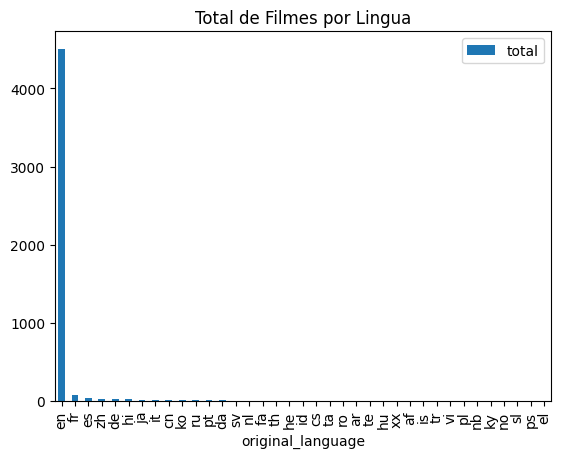

In [487]:
contagem_de_lingua.plot(x="original_language", y="total", kind="bar", title="Total de Filmes por Lingua") # Gráfico de barras

<Axes: xlabel='original_language', ylabel='count'>

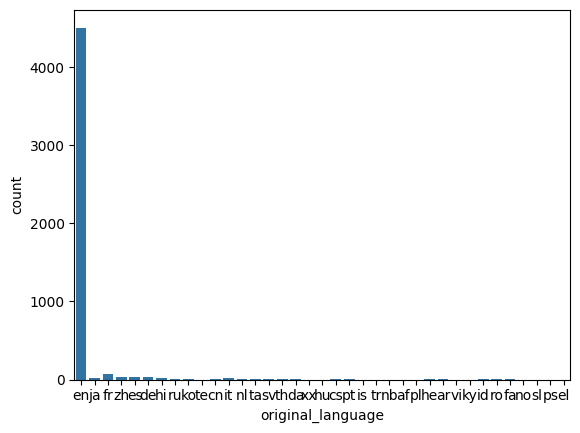

In [488]:
sns.countplot(data=tmdb, x="original_language") # Seaborn tendo uma forma prática para plotar o gráfico desejado

<Axes: ylabel='total'>

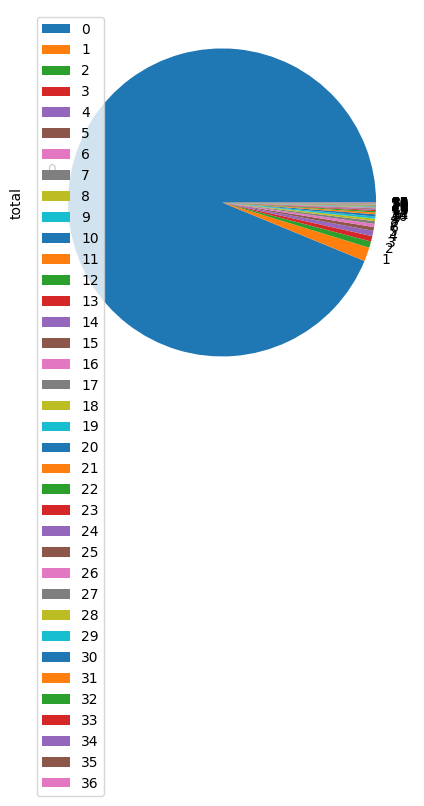

In [489]:
contagem_de_lingua.plot(kind = "pie", y="total", figsize=(5,5)) # Gráfico de pizza

Não usar gráfico de pizza / torta na apresentação

In [490]:
total_por_lingua = tmdb["original_language"].value_counts() # Pega os valores
total_geral = total_por_lingua.sum() # Define que a soma dos valores é o total
total_de_ingles = total_por_lingua.loc["en"] # Localiza en e transforma seu valor em variável
total_do_resto = total_por_lingua.sum() - total_de_ingles # Define o valor do resto sem 'en'
print(total_de_ingles, total_geral, total_do_resto) # Exibe tudo

4505 4803 298


In [491]:
dados = {
    "lingua" : ["Inglês", "Demais", "Total"],
    "total" : [total_de_ingles, total_do_resto, total_geral]
} # Transforma as novas variáveis e um novo data frame
dados = pd.DataFrame(dados)
dados

,lingua,total
0,Inglês,4505
1,Demais,298
2,Total,4803


<Axes: title={'center': 'Total de Filmes por Lingua'}, xlabel='lingua'>

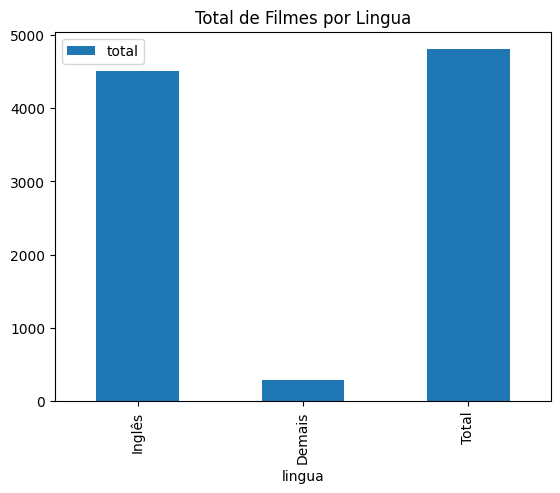

In [492]:
dados.plot(kind="bar", x="lingua", y="total", title="Total de Filmes por Lingua") # Gráfico de barras

In [493]:
total_demais_linguas = tmdb.query("original_language != 'en'")['original_language'].value_counts()
total_demais_linguas.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


<Axes: xlabel='original_language', ylabel='count'>

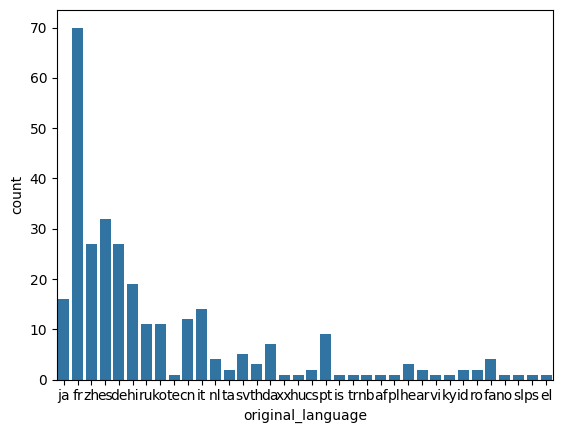

In [494]:
sns.countplot(data=tmdb.query("original_language != 'en'"), x="original_language") # Plotando gráfico metodo seaborn

<Axes: xlabel='original_language'>

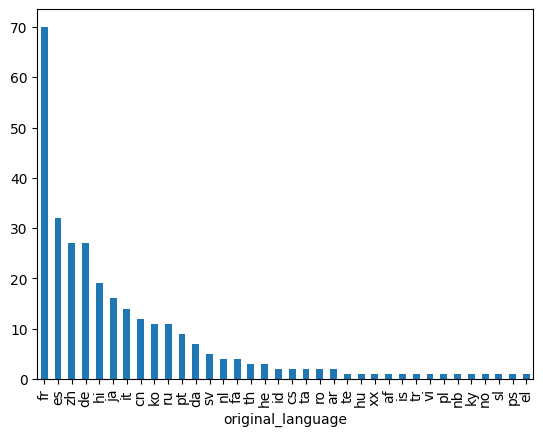

In [495]:
total_demais_linguas.plot(kind="bar") # Plotando gráfico metodo matplolib padrao

# Quinta Aula

<Axes: xlabel='original_language', ylabel='count'>

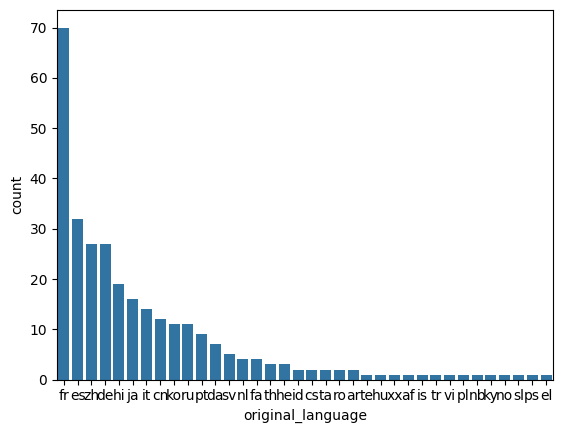

In [496]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_demais_linguas.index,
              x="original_language") # ordenando do maior a menor

<Axes: xlabel='original_language', ylabel='count'>

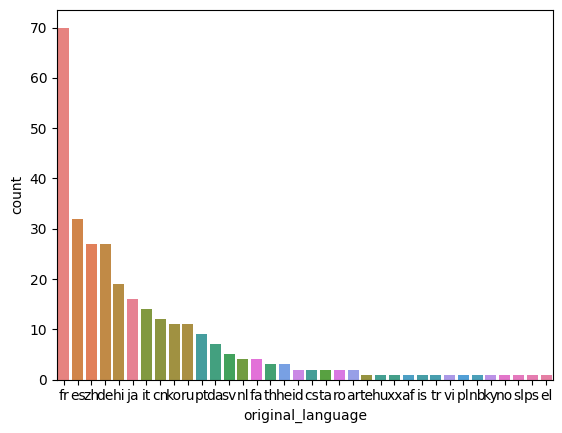

In [497]:
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_demais_linguas.index,
              hue="original_language",
              x="original_language") # Base que sera alterada

In [498]:
total_demais_linguas = tmdb.query("original_language != 'en'")['original_language'].value_counts(normalize=True)
total_demais_linguas.head() # Visualizando os percentuais

,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758


Text(0.5, 1.0, 'Distribuição das demais línguas')

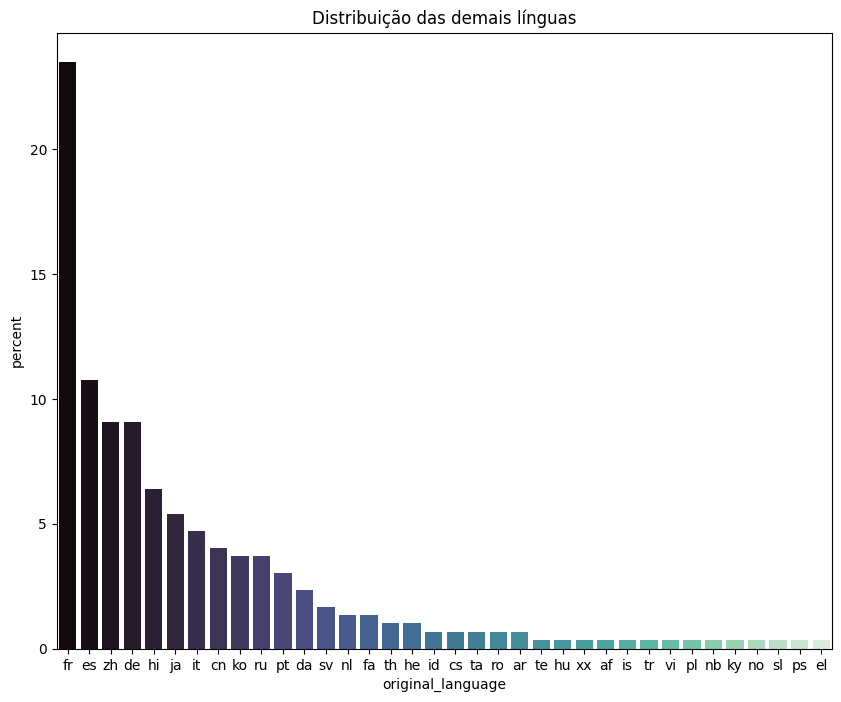

In [499]:
plt.figure(figsize=(10,8)) # Passando as característiscas do proximo gráfico
sns.countplot(data=tmdb.query("original_language != 'en'"),
              order=total_demais_linguas.index,
              hue="original_language",
              hue_order=total_demais_linguas.index,
              palette="mako",
              stat='percent',
              x="original_language")
plt.title("Distribuição das demais línguas") # Atualizo as cores e passo a ordem que elas devem ser colocadas, hue adiciona coloração e palette qual palta sera usada,
                                              # hue_order a ordem que seram pintadas, stat diz qual sera o tipo de dado (contagem, percentual, etc...)

# Sexta Aula

In [500]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [501]:
filme_notas_toy_story = notas.query("filmeId==1")["nota"]
filme_notas_jumanji = notas.query("filmeId==2")["nota"] # Criando variável sobre dado único se baseando em nome do filme

In [502]:
media_filme_notas_toy_story = notas.query("filmeId==1")["nota"].mean()
media_filme_notas_jumanji = notas.query("filmeId==2")["nota"].mean()
print(media_filme_notas_toy_story,media_filme_notas_jumanji) # Médias das Notas

3.9209302325581397 3.4318181818181817


In [503]:
media_filme_notas_toy_story = notas.query("filmeId==1")["nota"].median()
media_filme_notas_jumanji = notas.query("filmeId==2")["nota"].median()
print(media_filme_notas_toy_story,media_filme_notas_jumanji) # Medianas das Notas

4.0 3.5


In [504]:
filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] * 10 # Criando notas para os filmes

In [505]:
media_filme1 = np.mean(filme1)
media_filme2 = np.mean(filme2)
mediana_filme1 = np.median(filme1)
mediana_filme2 = np.median(filme2)
print(media_filme1, media_filme2)
print(mediana_filme1, mediana_filme2)


3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

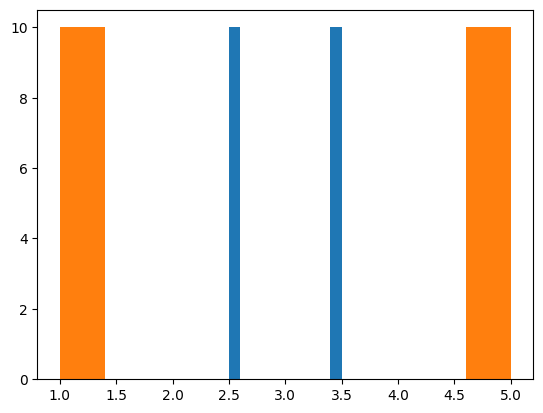

In [506]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9568f2ccb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c9568f2d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9568f2c9e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c9568f2d850>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c9568f2db50>,
 'means': []}

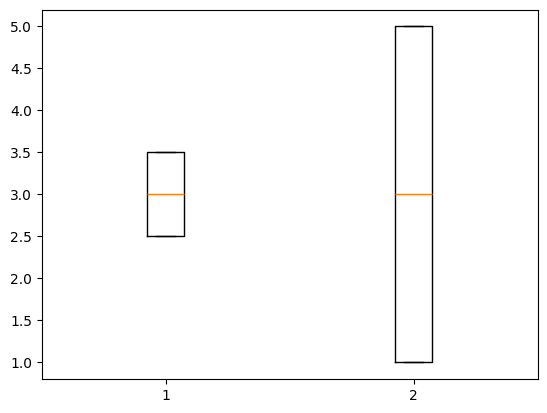

In [507]:
plt.boxplot([filme1, filme2]) # Muita informação é perdida apenas com informação, diferentes gráficos mostram dados perdidos

In [508]:
np.mean([3.0] * 20) # Todos os dados juntos

np.float64(3.0)

Desvio padrão

In [509]:
# x1 = 4, x2 = 5, x3 = 6 ... média = 4 + 5 + 6 = 15/3 = 5
# d** = (x1 - média)** + (x2 - média)** .... (xn - média)**/length (n = length) # Fórmula do desvio padrão
# d** = (4 - 5)** + (5 - 5) ** + (6 - 5)**/3 . . . (1 + 0 + 1)/3 ... d ** = 2/3 ... (raiz quadrada de 0,667) mais ou menos std = 0,816

In [510]:
np.std(filme1), np.std(filme2) # Desvio padrão

(np.float64(0.5), np.float64(2.0))

{'whiskers': [<matplotlib.lines.Line2D at 0x7c9568f960f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c9568f96690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c9568f95df0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c9568f96c00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c9568f73260>,
 'means': []}

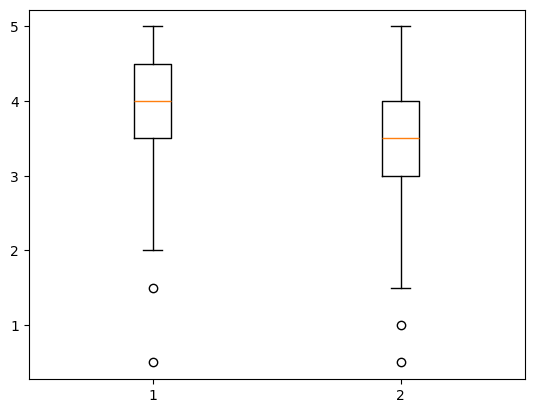

In [511]:
plt.boxplot([filme_notas_toy_story, filme_notas_jumanji])

/tmp/ipython-input-2679085653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query("filmeId in [1,2]"),


<Axes: xlabel='filmeId', ylabel='nota'>

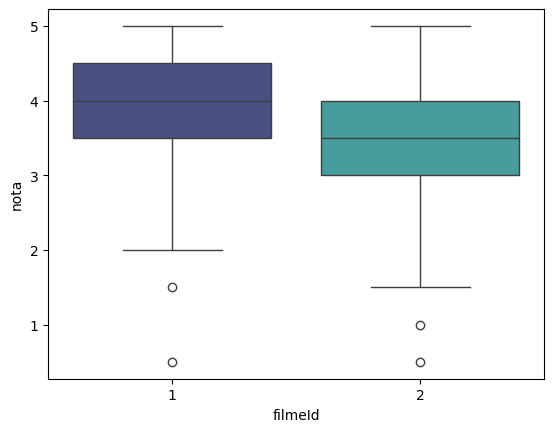

In [512]:
sns.boxplot(data=notas.query("filmeId in [1,2]"),
            x="filmeId",
            y="nota",
            palette='mako') # Pedindo diretamente sem extrair os dados, filmeId < 5 buscaria os 4 primeiros

In [513]:
notas.groupby('filmeId').count() # Exibe a contagem de valores inseridos

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [514]:
notas["filmeId"].value_counts().tail() # mostra o fim

,count
filmeId,
188833,1
189381,1
3899,1
2848,1
147002,1


In [515]:
notas.groupby('filmeId').count().query("nota == 1") # Ignorando os filmes com menos de 2 avaliações

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [516]:
filmes_com_mais_de_uma_nota = notas.groupby("filmeId").size() > 1
filmes_com_mais_de_uma_nota = filmes_com_mais_de_uma_nota[filmes_com_mais_de_uma_nota].index

media_notas_filmes_com_mais_de_uma_nota = notas.query("filmeId in @filmes_com_mais_de_uma_nota").groupby("filmeId")["nota"].mean()
print(media_notas_filmes_com_mais_de_uma_nota.head()) # Refaz as médias dos filmes ignorando aquelas que receberam apenas uma única avaliação

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64
